# Proyek Analisis Data: Air Quality

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana kualitas udara untuk setiap indikator dalam beberapa tahun yang terjadi?
- Pertanyaan 2 : Bagaimana kualitas udara dalam beberapa bulan?
- Pertanyaan 3 : Bagaimana kualitas udara dalam beberapa hari untuk setiap station?
- Pertanyaan 4: Bagaimaan korelasi antara berbagai elemen yang memengaruh kualitas udara?

## Import Semua Packages/Library yang Digunakan

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [13]:
# Read Data
wanshouxigong_df = pd.read_csv('./Data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')
changping_df = pd.read_csv('./Data/PRSA_Data_Changping_20130301-20170228.csv')

data = {
    "wanshouxigong_df" : wanshouxigong_df,
    "changping_df" :changping_df,}

# Create Date
full_date = []
for df_name,df in data.items():
    years = data[df_name]['year'].values
    months = data[df_name]['month'].values
    days = data[df_name]['day'].values
    hours = data[df_name]['hour'].values
    for i in range(data[df_name].shape[0]):
        date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
        full_date.append(date_time)
dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
for df_name,df in data.items():
    data[df_name]= pd.concat([dates,data[df_name]],axis=1)


### Assessing Data

In [3]:
data = {
    "wanshouxigong_df" : wanshouxigong_df,
    "changping_df" :changping_df,}

for df_name,df in data.items():
    print(data[df_name].head(5))

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013 

In [4]:
data = {
    "wanshouxigong_df" : wanshouxigong_df,
    "changping_df" :changping_df,}
    
for df_name,df in data.items():
    data[df_name].info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 t

In [5]:
data = {
    "wanshouxigong_df" : wanshouxigong_df,
    "changping_df" :changping_df,}

for df_name,df in data.items():
    print(data[df_name].describe())

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2          NO2            CO  \
count  34368.000000  34580.000000  34395.000000  34310.00000  33767.000000   
mean      85.024136    112.223459     17.148603     55.52956   1370.395031   
std       85.975981     97.593210     23.940834     35

### Cleaning Data

In [8]:
# Data Cleaning For wanshouxigong Data Frame
missingvaluewanshouxigong_df =data["wanshouxigong_df"].isna().sum()

# Filling Missing value with mean from describe for wanshouxigong_df
data["wanshouxigong_df"]['PM2.5'].fillna(value=85.02, inplace=True)
data["wanshouxigong_df"]['PM10'].fillna(value=112.22, inplace=True)
data["wanshouxigong_df"]['SO2'].fillna(value=17.14, inplace=True)
data["wanshouxigong_df"]['NO2'].fillna(value=55.53, inplace=True)
data["wanshouxigong_df"]['CO'].fillna(value=1370.40, inplace=True)
data["wanshouxigong_df"]['O3'].fillna(value=56.23, inplace=True)
data["wanshouxigong_df"]['TEMP'].fillna(value=13.78, inplace=True)
data["wanshouxigong_df"]['PRES'].fillna(value=1011.51, inplace=True)
data["wanshouxigong_df"]['DEWP'].fillna(value=2.71, inplace=True)
data["wanshouxigong_df"]['RAIN'].fillna(value=0.06, inplace=True)
data["wanshouxigong_df"]['WSPM'].fillna(value=1.7, inplace=True)
# Filling Missing Value with top data for null value
data["wanshouxigong_df"]['wd'].fillna(value="", inplace=True)

# Filling Missing value with mean from describe for changping_df
missingvaluechangping_df =data["changping_df"].isna().sum()
data["changping_df"]['PM2.5'].fillna(value=71.09, inplace=True)
data["changping_df"]['PM10'].fillna(value=94.65, inplace=True)
data["changping_df"]['SO2'].fillna(value=14.95, inplace=True)
data["changping_df"]['NO2'].fillna(value=44.18, inplace=True)
data["changping_df"]['CO'].fillna(value=1152.30, inplace=True)
data["changping_df"]['O3'].fillna(value=57.94, inplace=True)
data["changping_df"]['TEMP'].fillna(value=13.68, inplace=True)
data["changping_df"]['PRES'].fillna(value=1007.76, inplace=True)
data["changping_df"]['DEWP'].fillna(value=1.50, inplace=True)
data["changping_df"]['RAIN'].fillna(value=0.06, inplace=True)
data["changping_df"]['WSPM'].fillna(value=1.85, inplace=True)
# Filling Missing Value with top data for null value
data["changping_df"]['wd'].fillna(value="NNW ", inplace=True)

print(missingvaluechangping_df)

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


C:\Users\Daniel Siregar\AppData\Local\Temp\ipykernel_22728\3749706492.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["wanshouxigong_df"]['PM2.5'].fillna(value=85.02, inplace=True)
C:\Users\Daniel Siregar\AppData\Local\Temp\ipykernel_22728\3749706492.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

## Exploratory Data Analysis (EDA)

Grouping by Year

In [9]:
for df_name,df in data.items():
    data[df_name].groupby("year").mean(numeric_only=True)

Grouping by Month

In [10]:
for df_name,df in data.items():
    data[df_name].groupby("month").mean(numeric_only=True)

Grouping by Day

In [11]:
for df_name,df in data.items():
    data[df_name].groupby("day").mean(numeric_only=True)

Grouping by Hour

In [12]:
for df_name,df in data.items():
    data[df_name].groupby("hour").mean(numeric_only=True)

Grouping by Station

In [13]:
for df_name,df in data.items():
    data[df_name].groupby(["year","station"]).mean(numeric_only=True)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kualitas udara untuk setiap indikator dalam beberapa tahun yang terjadi?

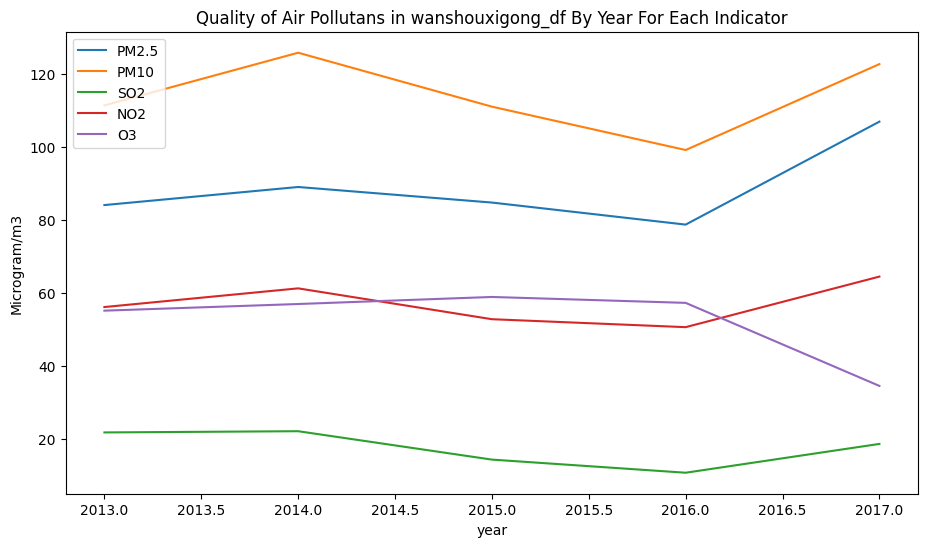

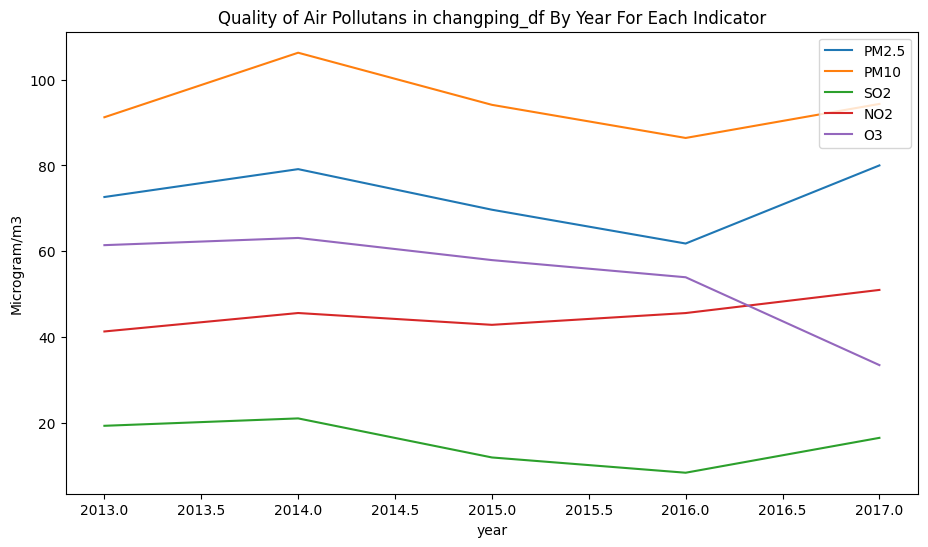

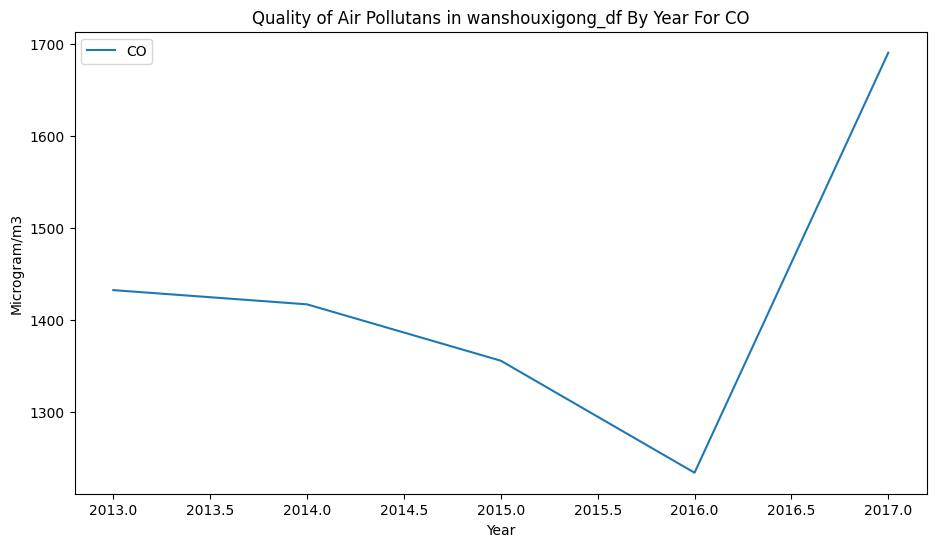

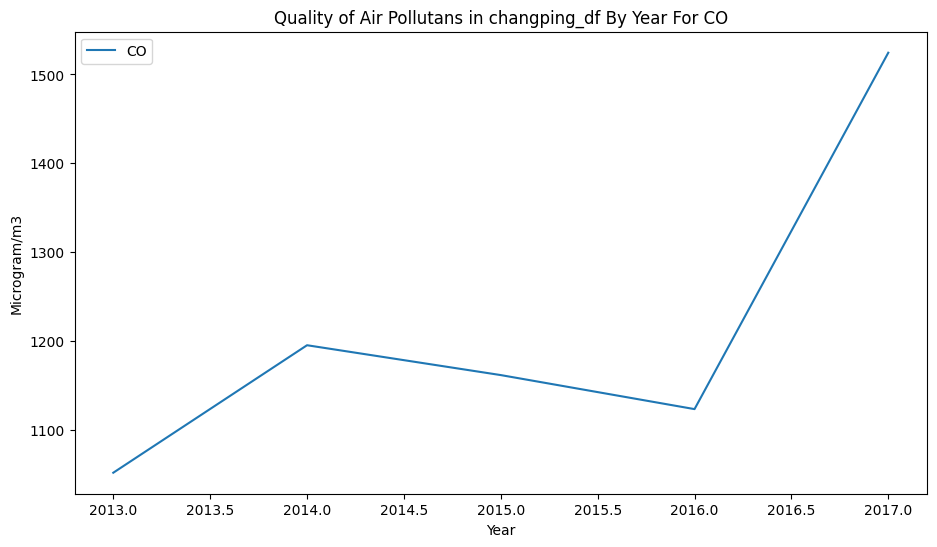

In [15]:
for df_name,df in data.items():
    groupByYear = data[df_name].groupby("year").mean(numeric_only=True)
    plt.figure(figsize=(11,6))
    plt.plot(groupByYear.index, groupByYear["PM2.5"], label="PM2.5")
    plt.plot(groupByYear.index, groupByYear["PM10"], label="PM10")
    plt.plot(groupByYear.index, groupByYear["SO2"], label="SO2")
    plt.plot(groupByYear.index, groupByYear["NO2"], label="NO2")
    plt.plot(groupByYear.index, groupByYear["O3"], label="O3")
    plt.xlabel("year")
    plt.ylabel("Microgram/m3")
    plt.legend()
    plt.title(f"Quality of Air Pollutans in {df_name} By Year For Each Indicator")
    plt.show()

#Plot for CO because the indicator is to high 
for df_name,df in data.items():
    groupByYear = data[df_name].groupby("year").mean(numeric_only=True)
    plt.figure(figsize=(11,6))
    plt.plot(groupByYear.index, groupByYear["CO"], label="CO")
    plt.xlabel("Year")
    plt.ylabel("Microgram/m3")
    plt.title(f"Quality of Air Pollutans in {df_name} By Year For CO")
    plt.legend()
    plt.show()
    

### Pertanyaan 2: Bagaimana kualitas udara dalam beberapa bulan?

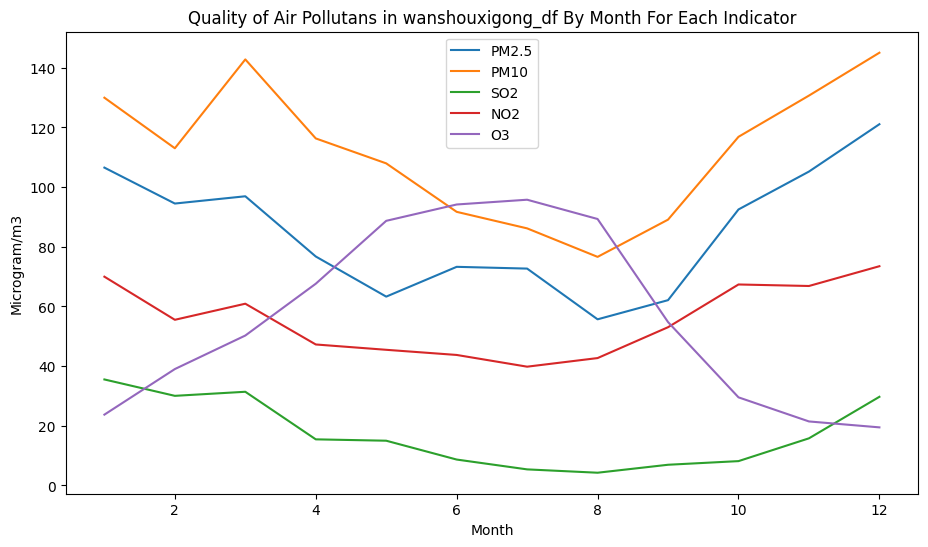

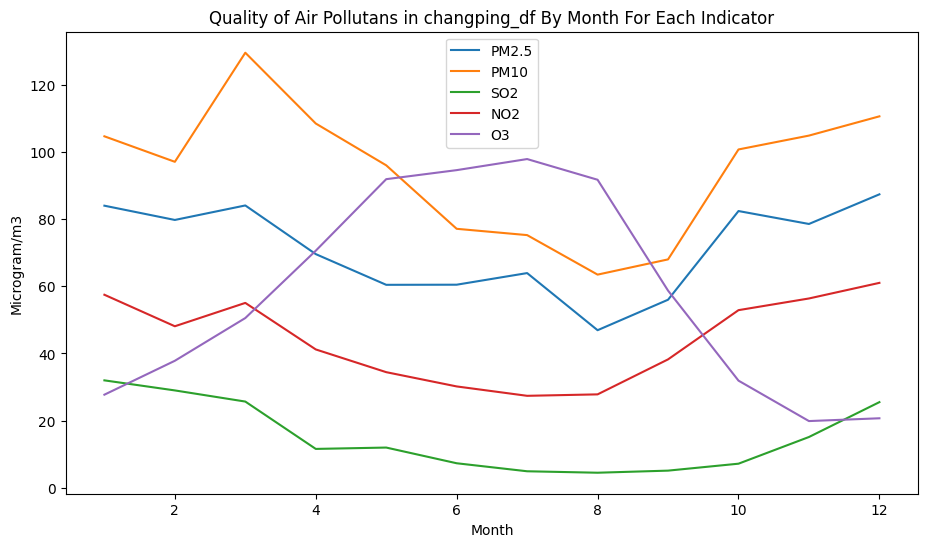

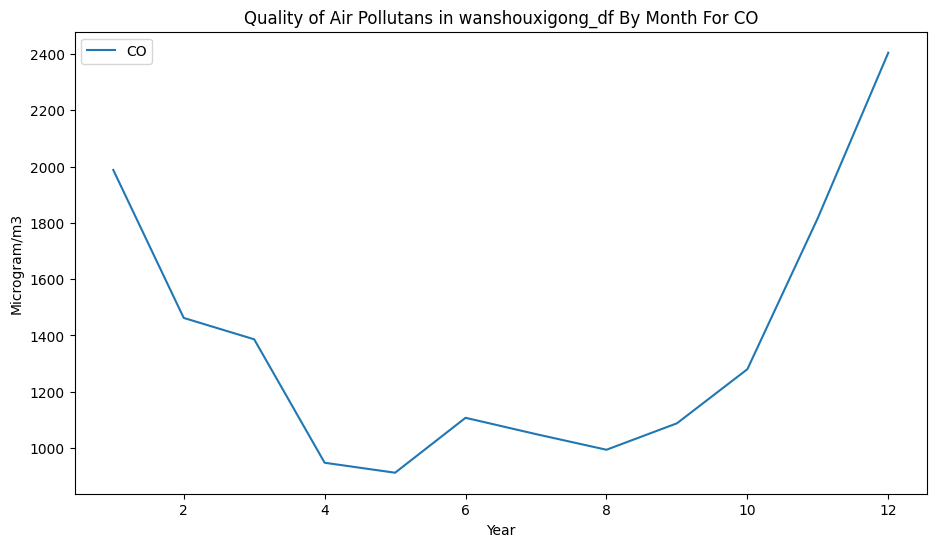

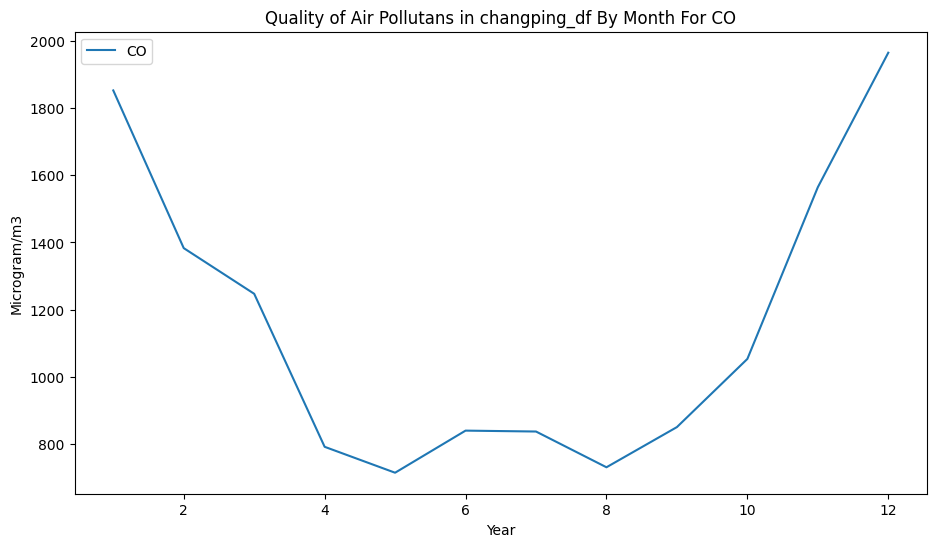

In [10]:
for df_name,df in data.items():
    groupByMonth =data[df_name].groupby("month").mean(numeric_only=True)
    plt.figure(figsize=(11,6))
    plt.plot(groupByMonth.index, groupByMonth["PM2.5"], label="PM2.5")
    plt.plot(groupByMonth.index, groupByMonth["PM10"], label="PM10")
    plt.plot(groupByMonth.index, groupByMonth["SO2"], label="SO2")
    plt.plot(groupByMonth.index, groupByMonth["NO2"], label="NO2")
    plt.plot(groupByMonth.index, groupByMonth["O3"], label="O3")
    plt.xlabel("Month")
    plt.ylabel("Microgram/m3")
    plt.legend()
    plt.title(f"Quality of Air Pollutans in {df_name} By Month For Each Indicator")
    plt.show()

#Plot for CO because the indicator is to high 
for df_name,df in data.items():
    groupByYear = data[df_name].groupby("month").mean(numeric_only=True)
    plt.figure(figsize=(11,6))
    plt.plot(groupByYear.index, groupByYear["CO"], label="CO")
    plt.xlabel("Year")
    plt.ylabel("Microgram/m3")
    plt.title(f"Quality of Air Pollutans in {df_name} By Month For CO")
    plt.legend()
    plt.show()

### Pertanyaan 3: Bagaimana kualitas udara dalam beberapa hari untuk setiap station?

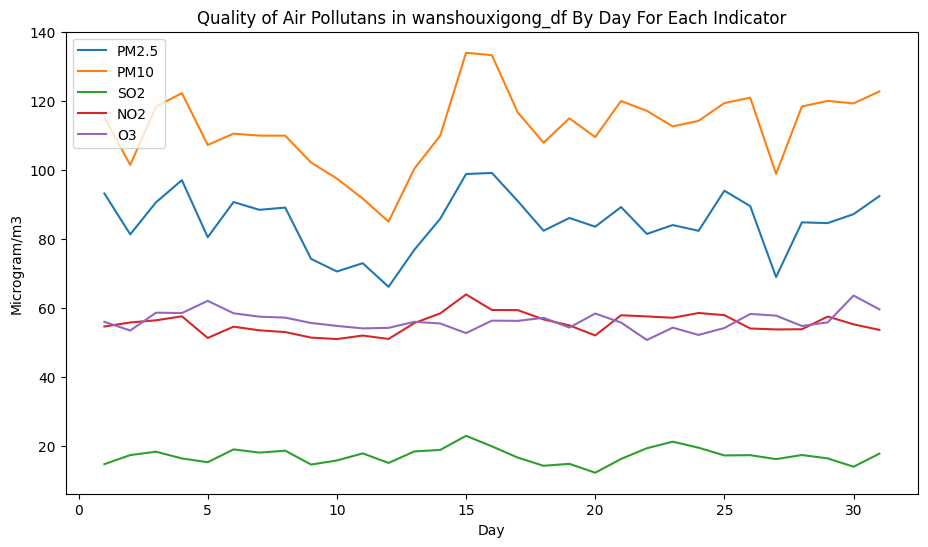

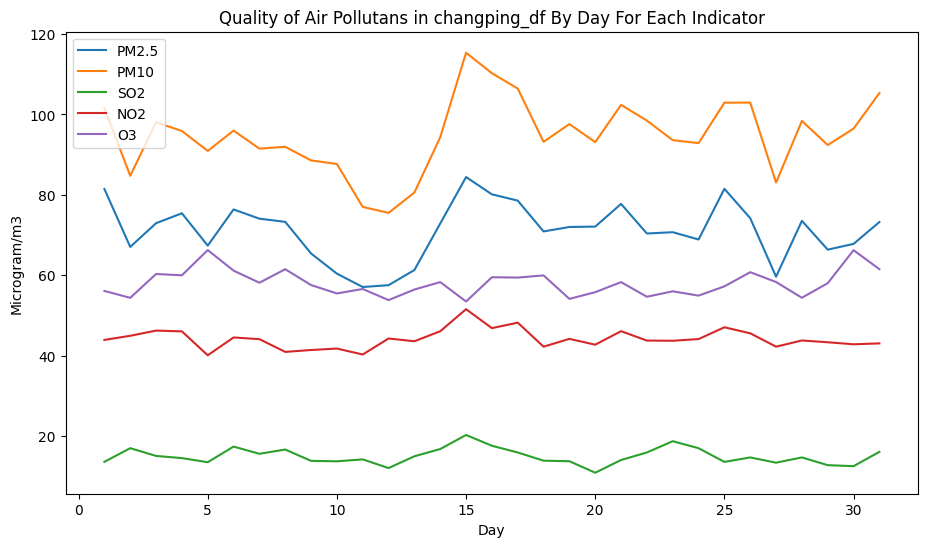

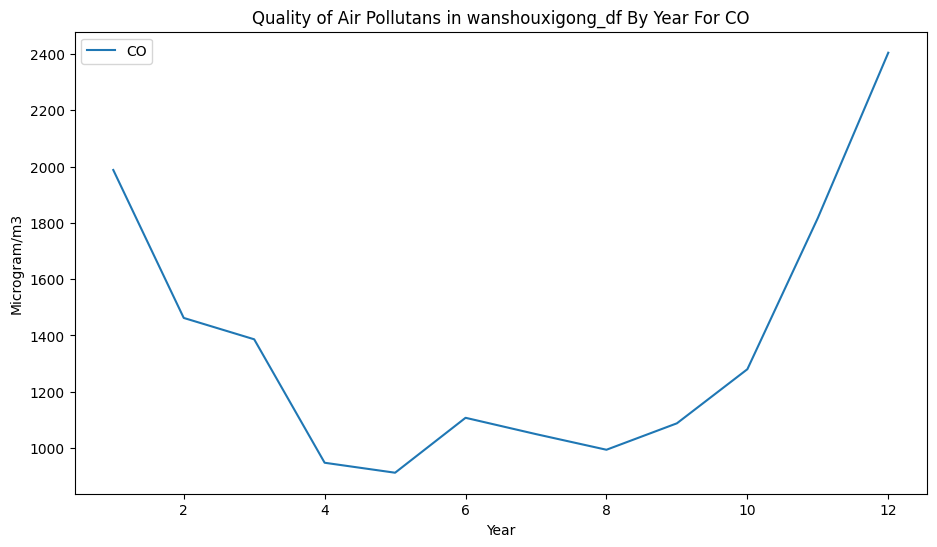

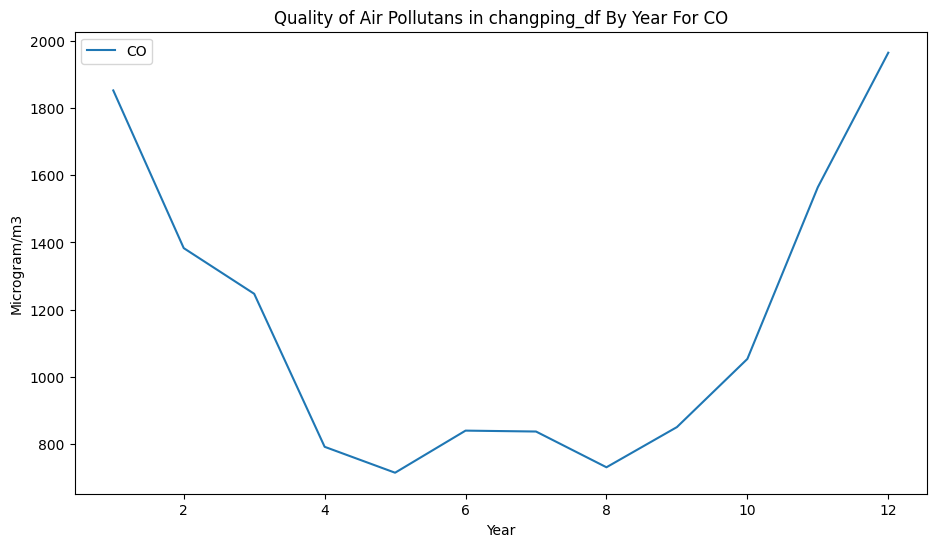

In [16]:
for df_name,df in data.items():
    groupByDay =data[df_name].groupby("day").mean(numeric_only=True)
    plt.figure(figsize=(11,6))
    plt.plot(groupByDay.index, groupByDay["PM2.5"], label="PM2.5")
    plt.plot(groupByDay.index, groupByDay["PM10"], label="PM10")
    plt.plot(groupByDay.index, groupByDay["SO2"], label="SO2")
    plt.plot(groupByDay.index, groupByDay["NO2"], label="NO2")
    plt.plot(groupByDay.index, groupByDay["O3"], label="O3")
    plt.xlabel("Day")
    plt.ylabel("Microgram/m3")
    plt.legend()
    plt.title(f"Quality of Air Pollutans in {df_name} By Day For Each Indicator")
    plt.show()
    
#Plot for CO because the indicator is to high 
for df_name,df in data.items():
    groupByYear = data[df_name].groupby("month").mean(numeric_only=True)
    plt.figure(figsize=(11,6))
    plt.plot(groupByYear.index, groupByYear["CO"], label="CO")
    plt.xlabel("Year")
    plt.ylabel("Microgram/m3")
    plt.title(f"Quality of Air Pollutans in {df_name} By Year For CO")
    plt.legend()
    plt.show()

### Pertanyaan 4: Bagaimaan korelasi antara berbagai elemen yang memengaruh kualitas udara?

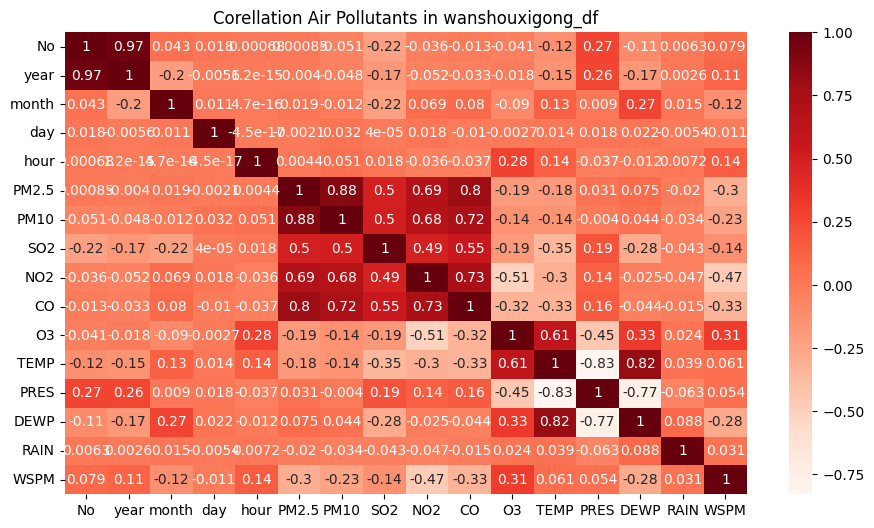

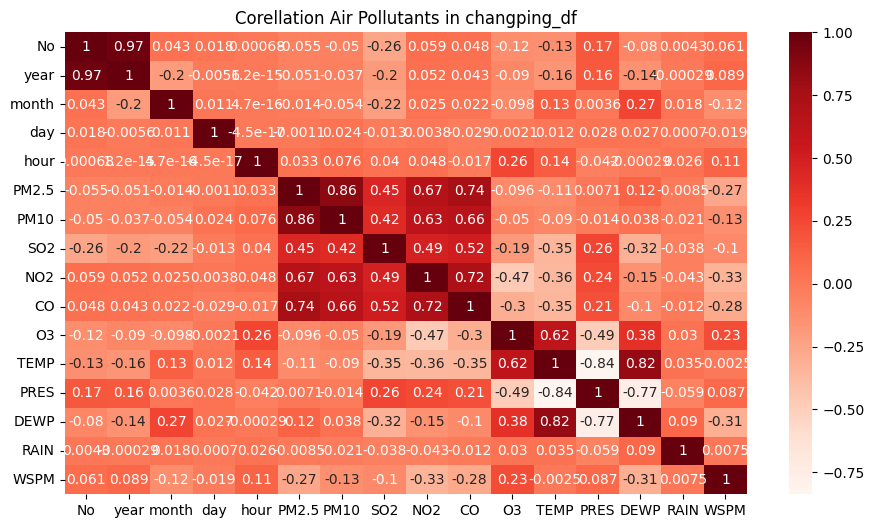

In [17]:
for df_name,df in data.items():
    plt.figure(figsize=(11,6))
    sns.heatmap(data[df_name].corr(numeric_only = True),cmap=plt.cm.Reds,annot=True)
    plt.title(f"Corellation Air Pollutants in {df_name}")
    plt.show()

## Conclusion

- Pertanyaan 1: Bagaimana kualitas udara untuk setiap indikator dalam beberapa tahun yang terjadi?

Kualitas udara di setiap station 
dalam kurun waktu tahunan didominasi dengan penurunan polusi untuk setiap indikatornya walaupun tetap terjadi kenaikan dibeberapa periode waktu. Hal ini tentu menunjukan perbaikan yang baik untuk kualitas udara di setiap stationnya

- Pertanyaan 2: Pertanyaan 2: Bagaimana kualitas udara dalam beberapa bulan?

Kualitas udara di setiap station 
dalam kurun waktu bulan tentu merupakan hasil breakdown kualitas udara dalam kurun waktu tahunan. Pada periode bulanan ini didominasi dengan penurunan polusi untuk setiap indikatornya walaupun tetap terjadi kenaikan dibeberapa periode waktu. Perbaikan bulanan untuk beberapa periode waktu tetap diperlukan guna mendukung hasil kualitas udara yang baik disetiap tahunnya

- Pertanyaan 3: Bagaimana kualitas udara dalam beberapa hari untuk setiap station?

Berdasarkan hasil kualitas udara harian untuk setiap stationya, tren yang dapat dilihat berdasarkan visualisasi data yang telah dilakukan adalah tren fluktuasi yang didominasi oleh penurunan polusi yang terjadi.

- Pertanyaan 4: Bagaimaan korelasi antara berbagai elemen yang memengaruh kualitas udara?

Terdapat hubungan yang kuat untuk PM2.5, PM10, S02, NO2, dan CO dengan rataan nilai korelasi lebih dari 0.5